In [82]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd

In [83]:
features = np.load('feature_array_2.npz')
participants = pd.read_csv('participants.tsv', sep='\t')

In [152]:
numerical_features = np.array([item[1] for item in features.items()])
#metadata_features = participants[['Gender', 'Age', 'MMSE']].values
labels = participants['Group'].values[0:65]

In [153]:
labels

array(['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
       'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C'],
      dtype=object)

In [102]:
unique_elements, indices = np.unique(labels, return_inverse=True)

# The indices array contains the numerical representation
numerical_array = indices[0:65]

print(numerical_array.shape)

(65,)


In [89]:
numerical_features.shape

(88, 25, 665)

In [14]:
num_feat=np.reshape(numerical_features,(88, 16625))

In [90]:
num_feat.shape

(88, 16625)

In [104]:
num_feat=num_feat[0:65,:]

In [127]:
numerical_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Best Parameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.5384615384615384
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.50      0.50      0.50         6

    accuracy                           0.54        13
   macro avg       0.54      0.54      0.54        13
weighted avg       0.54      0.54      0.54        13



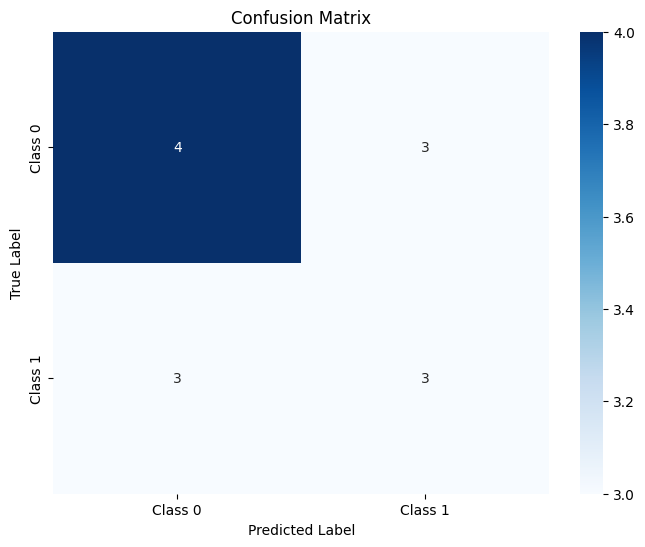

In [ ]:
#do not delete
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


X=num_feat
y=numerical_array
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


feature_selector = SelectFromModel(LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000))
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = feature_selector.transform(X_test)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_resampled)

best_params = grid_search.best_params_


logistic_model = LogisticRegression(**best_params, class_weight='balanced')
logistic_model.fit(X_train_selected, y_train_resampled)


y_pred = logistic_model.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [149]:
!pip install -U imbalanced-learn
